In [1]:
import os
import random
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
TRAIN_DIR = 'D:/AIUB 10th semester/Vision/CIFAR-10-images-master/train'
CATEGORIES = []
for c in os.listdir(TRAIN_DIR):
    CATEGORIES.append(c)
print(CATEGORIES)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [3]:
TRAIN_DATA = []
for c in CATEGORIES:
    path = os.path.join(TRAIN_DIR,c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path,img))
        TRAIN_DATA.append([img_arr, class_num])
print(len(TRAIN_DATA))

100%|██████████| 5000/5000 [00:32<00:00, 152.97it/s]

50000


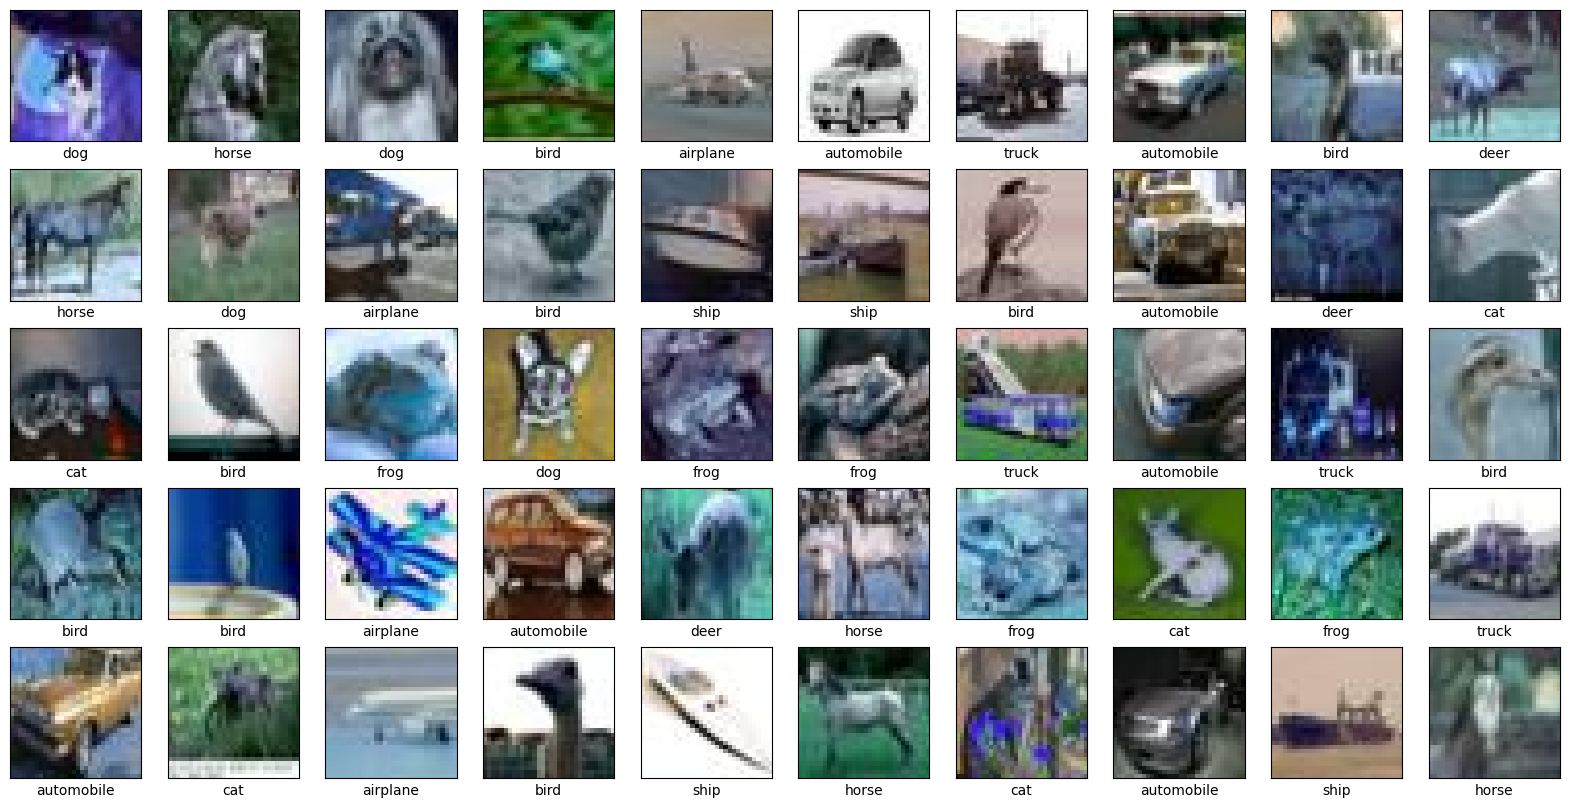

In [4]:
random.shuffle(TRAIN_DATA)
plt.figure(figsize=(20,10))

for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(TRAIN_DATA[i][0])
    plt.xlabel(CATEGORIES[TRAIN_DATA[i][1]])
    plt.xticks([])
    plt.yticks([])
    if i==50:
        break
plt.show()

In [5]:
f0 = TRAIN_DATA[0:1000]
f1 = TRAIN_DATA[1000:2000]
f2 = TRAIN_DATA[2000:3000]
f3 = TRAIN_DATA[3000:4000]
f4 = TRAIN_DATA[4000:5000]

In [6]:
class NearestNeighbour:
    
    def __init__(self,k,distancemetric="l2"):
        self.K = k
        self.trainSet = None
        self.distanceMetric = distancemetric.lower()
        
    def fit(self,train):
        self.trainSet = train

    # Calculating L2 distance
    def __L2_distance(self, train_img,test_img):
        temp = train_img - test_img
        dis = np.sqrt(np.sum(np.square(temp)))
        return dis
    
    # function to calculate the distance 
    def __distanceCalculator(self,validate):
        accuracy = 0
        for vidx in range(len(validate)):
            distnaceList = []
            cnt = 0
            for tidx in range(len(self.trainSet)):
                d = 0
                if self.distanceMetric == 'l2':
                    d = self.__L2_distance(self.trainSet[tidx][0],validate[vidx][0])
                distnaceList.append((d,self.trainSet[tidx][1]))
            # sorting the distance array 
            distnaceList.sort(key=(lambda a: a[0]))
            labels = [v[1] for v in distnaceList[:self.K]]
            label = max(set(labels), key = labels.count)
            
            if label == validate[vidx][1]:
                cnt+=1
            
            accuracy += cnt
            
        return accuracy, (accuracy/len(validate))
    
    #Function prediction
    def predict(self,validate):
        return self.__distanceCalculator(validate)

In [7]:
def plot_Accuracies(fold,k_choices,accuracies):
    best = [0,0]
    for k in k_choices:
        accu = accuracies[k]
        if best[1]< max(accu):
            best[0]=k
            best[1]=max(accu)
        plt.scatter([k] * len(accu), accu)

    # plot the trend line with error bars that correspond to standard deviation

    accuracies_mean = np.array([np.mean(v) for k,v in sorted(accuracies.items())])
    accuracies_std = np.array([np.std(v) for k,v in sorted(accuracies.items())])
    plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
    plt.title(f"Cross-validation   fold={fold}   K={best[0]}   Accuracy = {best[1]}")
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.show()

In [8]:
k_choices = [11,15,9,5,6,10,16]

accuracis = {}
nfolds = 4
# creating the dictonary of k with empty list
for k in k_choices:
    accuracis[k]=[]
    
for i in range(nfolds):
    if i==0:
        trainSet = f1+f2+f3+f4
        validate = f0
    elif i==1:
        trainSet = f0+f2+f3+f4
        validate = f1
    elif i==2:
        trainSet = f1+f0+f3+f4
        validate = f2
    elif i==3:
        trainSet = f1+f2+f0+f4
        validate = f3
    elif i==4:
        trainSet = f1+f2+f3+f0
        validate = f4

    for k in k_choices:

        classifier = NearestNeighbour(k,'l2')
        classifier.fit(trainSet)
        cnt, acc = classifier.predict(validate)

        accuracis[k].append(acc)

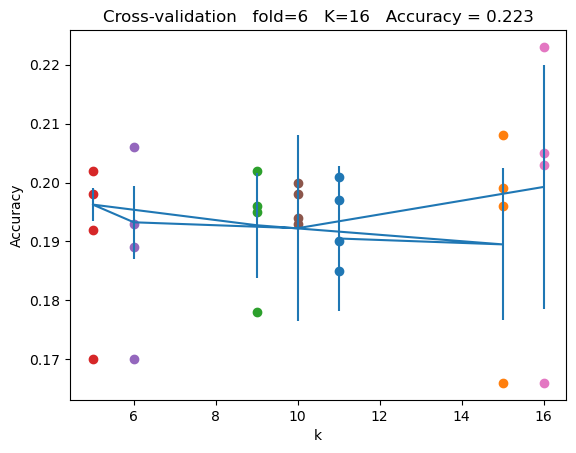

In [9]:
plot_Accuracies(6,k_choices,accuracis)